In [9]:
# data processing
import pandas as pd 

from scipy import stats
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv('Results.csv')

In [11]:
#Inspect the first 5 rows 
df.head()

,Temp,Age,SL,Protocol_number,Equilibrium_loss,Induction,Loss_of_touch_response,RR_5M,Movement_post_anaesthesia,ER_post_anaesthesia,Notes
0,24.0,29,8.0,1,75,80,120,111,253.0,243.0,NaN
1,24.0,29,7.5,2,58,59,83,0,60.0,145.0,NaN
2,24.0,29,7.5,3,30,31,40,0,342.0,351.0,NaN
3,25.0,29,9.0,4,19,25,36,0,368.0,403.0,NaN
4,25.0,29,6.5,5,202,120,324,0,1208.0,1368.0,NaN


In [58]:
#Perform test of normality
print('NORMALITY TEST USING SHAPIRO TEST')
from scipy.stats import mstats

for Y,title in [('Induction', 'Induction time (mm:ss)'),('Loss_of_touch_response', 'Time taken to \n lose touch responsiveness (mm:ss)'),('Movement_post_anaesthesia', 'Time taken to regain movement (mm:ss)'),('ER_post_anaesthesia','Time taken to recover (mm:ss)'),('RR_5M','Beats per minute at 5:00')]:
    print("\033[1m"+title+"\033[0m")
    #fig, axes = plt.subplots(figsize=(8,6))
    #sns.set(font_scale=2)
    protocol1_df=df.query('Protocol_number==1')
    protocol2_df=df.query('Protocol_number==2')
    P1and2_df= pd.concat([protocol1_df, protocol2_df])

    protocol3_df=df.query('Protocol_number==3')
    protocol4_df=df.query('Protocol_number==4')
    P3and4_df= pd.concat([protocol3_df, protocol4_df])

    protocol5_df=df.query('Protocol_number==5')
    protocol6_df=df.query('Protocol_number==6')
    P5and6_df= pd.concat([protocol5_df, protocol6_df])

    a=P1and2_df[Y]
    b=P3and4_df[Y]
    c=P5and6_df[Y]
    
    protocol1_df=df.query('Protocol_number==1')
    protocol2_df=df.query('Protocol_number==2')
    protocol3_df=df.query('Protocol_number==3')
    protocol4_df=df.query('Protocol_number==4')
    protocol5_df=df.query('Protocol_number==5')
    protocol6_df=df.query('Protocol_number==6')

    d=protocol1_df[Y]
    e=protocol2_df[Y]
    f=protocol3_df[Y]
    g=protocol4_df[Y]
    h=protocol5_df[Y]
    i=protocol6_df[Y]

    for i,k in [(a,'P1 and P2'),(b,'P3 and P4'),(c,'P5 and P6'),(d,'P1'),(e,'P2'),(f,'P3'),(g,'P4'),(h,'P5'),(i,'P6')]:
        z,pval = stats.shapiro(i)
        alpha = 0.05
        print('*****')
        print(k)
        print("pval = {:g}".format(pval))
        if pval < alpha:  # null hypothesis: x comes from a normal distribution
            print('Not normal distribution')
        else:
            print('Likely normal distribution')

    #import numpy as np 
    #import pylab 
    #import scipy.stats as stats

    #measurements = i   
    #stats.probplot(measurements, dist="norm", plot=pylab)
    #pylab.show()

NORMALITY TEST USING SHAPIRO TEST
Induction time (mm:ss)
*****
P1 and P2
pval = 0.0144629
Not normal distribution
*****
P3 and P4
pval = 0.00162154
Not normal distribution
*****
P5 and P6
pval = 0.00429286
Not normal distribution
*****
P1
pval = 0.0575302
Likely normal distribution
*****
P2
pval = 0.218998
Likely normal distribution
*****
P3
pval = 0.00528883
Not normal distribution
*****
P4
pval = 0.0198178
Not normal distribution
*****
P5
pval = 0.818117
Likely normal distribution
*****
P6
pval = 0.00524529
Not normal distribution
Time taken to 
 lose touch responsiveness (mm:ss)
*****
P1 and P2
pval = 0.0278624
Not normal distribution
*****
P3 and P4
pval = 0.00113458
Not normal distribution
*****
P5 and P6
pval = 0.00189356
Not normal distribution
*****
P1
pval = 0.0828275
Likely normal distribution
*****
P2
pval = 0.0234856
Not normal distribution
*****
P3
pval = 0.0283909
Not normal distribution
*****
P4
pval = 0.00282433
Not normal distribution
*****
P5
pval = 0.0247596
Not norm

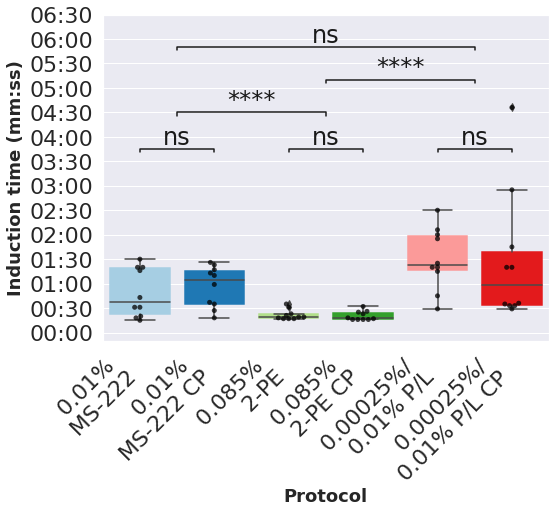

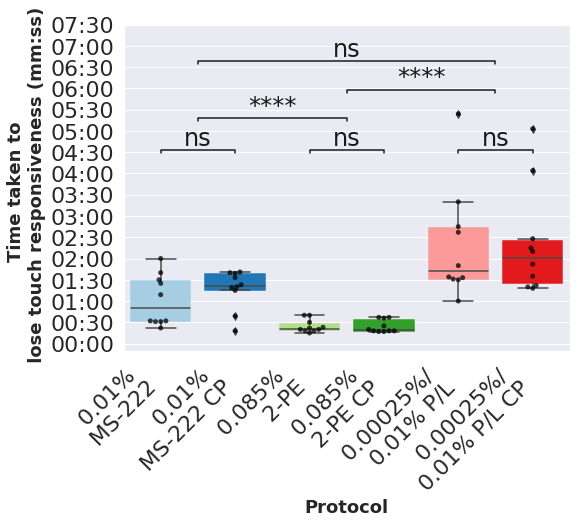

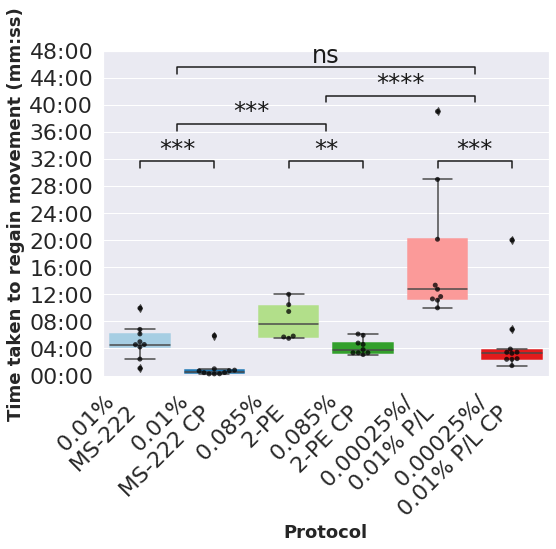

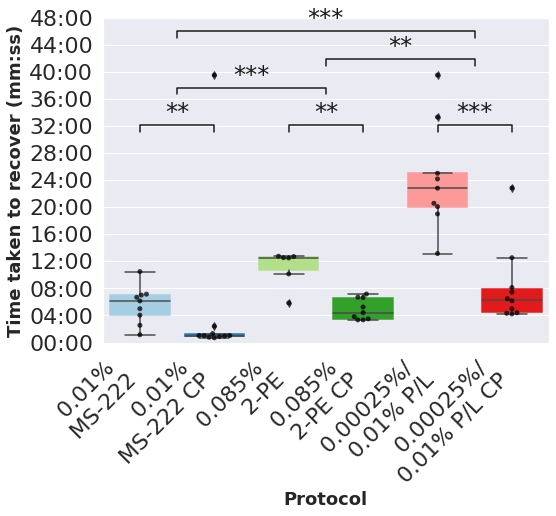

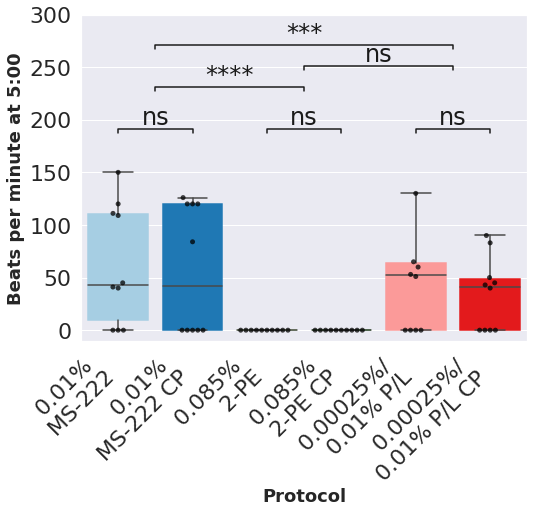

In [83]:
#Produces all of the plots for Experiment B

import seaborn as sns, matplotlib.pyplot as plt
import scipy
from scipy.stats import mannwhitneyu

for Y,title in [('Induction', 'Induction time (mm:ss)'),('Loss_of_touch_response', 'Time taken to \n lose touch responsiveness (mm:ss)'),('Movement_post_anaesthesia', 'Time taken to regain movement (mm:ss)'),('ER_post_anaesthesia','Time taken to recover (mm:ss)'),('RR_5M','Beats per minute at 5:00')]:
        
    fig, axes = plt.subplots(figsize=(8,6))
    sns.set(font_scale=2)
    protocol1_df=df.query('Protocol_number==1')
    protocol2_df=df.query('Protocol_number==2')
    P1and2_df= pd.concat([protocol1_df, protocol2_df])

    protocol3_df=df.query('Protocol_number==3')
    protocol4_df=df.query('Protocol_number==4')
    P3and4_df= pd.concat([protocol3_df, protocol4_df])

    protocol5_df=df.query('Protocol_number==5')
    protocol6_df=df.query('Protocol_number==6')
    P5and6_df= pd.concat([protocol5_df, protocol6_df])

    a=P1and2_df[Y]
    b=P3and4_df[Y]
    c=P5and6_df[Y]
    
    
    if Y=='Induction' or Y=='Loss_of_touch_response':
        h1=30
        h2=40
        h=4
    elif Y!='RR_5M':
        h1=400
        h2=250
        h=60
    else:
        h1=300
        h2=20
        h=4
        
    tips = df
    ax=sns.boxplot(x="Protocol_number", y=Y, data=tips)
    # add swarmplot
    ax=sns.swarmplot(x="Protocol_number", y=Y, data=tips, color='black', alpha=0.75)
    ax.set(ylim=(-10, 300))
    ax.set(xlabel='Protocol number', ylabel=Y)
    t2, p2 = scipy.stats.mannwhitneyu(a,b)
    #print("Protocols 1 and 2")
    #print("t = " + str(t2))
    #print("p = " + str(p2))
    
    if Y!='RR_5M':
        t3, p3 = scipy.stats.mannwhitneyu(c,d)
        #print("Protocols 3 and 4")
        #print("t = " + str(t3))
        #print("p = " + str(p3))
    else:
        t3,p3=0,1
    t4, p4 = scipy.stats.mannwhitneyu(e,f)
    #print("Protocols 5 and 6")
    #print("t = " + str(t4))
    #print("p = " + str(p4))

    def stars(p):
       if p < 0.0001:
           return "****"
       elif (p < 0.001):
           return "***"
       elif (p < 0.01):
           return "**"
       elif (p < 0.05):
           return "*"
       else:
           return "ns"

    s = stars(p2)


    for i in range(3):
    # statistical annotation
        x1 = i*2+0.5
        x2 = i*2+2.5 # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
        if Y=='RR_5M':
            y, col = tips[Y].max() - h1 -80, 'k'
        else:
            y, col = tips[Y].max() - h1 -20, 'k'

        if i < 1:
           p=p2
           y+=h2
        elif i == 1:
           p=p3
           y+=2*h2
        else: 
           p=p4
           x1=0.5
           x2=4.5
           y+=3*h2

        plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
        plt.text((x1+x2)*.5, y+h, stars(p), ha='center', va='bottom', color=col)

    protocol1_df=df.query('Protocol_number==1')
    protocol2_df=df.query('Protocol_number==2')
    protocol3_df=df.query('Protocol_number==3')
    protocol4_df=df.query('Protocol_number==4')
    protocol5_df=df.query('Protocol_number==5')
    protocol6_df=df.query('Protocol_number==6')

    a=protocol1_df[Y]
    b=protocol2_df[Y]
    c=protocol3_df[Y]
    d=protocol4_df[Y]
    e=protocol5_df[Y]
    f=protocol6_df[Y]

    tips = df.dropna(how='all')
    t2, p2 = scipy.stats.mannwhitneyu(a,b)
    #print("Protocols 1 and 2")
    #print("t = " + str(t2))
    #print("p = " + str(p2))
    if Y!='RR_5M':
        t3, p3 = scipy.stats.mannwhitneyu(c,d)
        #print("Protocols 3 and 4")
        #print("t = " + str(t3))
        #print("p = " + str(p3))
    else:
        t3,p3=0,1
    t4, p4 = scipy.stats.mannwhitneyu(e,f)
    #print("Protocols 5 and 6")
    #print("t = " + str(t4))
    #print("p = " + str(p4))


    for i in range(3):
    # statistical annotation
        x1 = i*2
        x2 = i*2+1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
        if Y!='Induction' and Y!='Loss_of_touch_response':
            y, col = tips[Y].max() - h1 -100, 'k'
        elif Y!='RR_5M':
            y, col = tips[Y].max() - h1 -25 , 'k'
        else:
            y, col = tips[Y].max() - h1 -90 , 'k'
        plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
        if i < 1:
           p=p2
        elif i == 1:
           p=p3
        else: 
           p=p4
        plt.text((x1+x2)*.5, y+h, stars(p), ha='center', va='bottom', color=col)

    if Y=='RR_5M':
        inc=max([np.int(np.round(tips[Y].max()/10)),1])
        additional_space=inc
        y_lim_max=np.int(np.round(tips[Y].max()))+additional_space
        #In seconds
        y_actual_max=y_lim_max  
    else:
        list=[]  
        #In minutes
        inc=max([np.int(np.round(tips[Y].max()/600)),1])
        if Y=='Induction':
            additional_space=2*inc
        else:
            additional_space=3*inc
        y_lim_max=np.int(np.round(tips[Y].max()/60))+additional_space
        #In seconds
        y_actual_max=y_lim_max*60
        #additional space for extra plotting at the top (*'s etc.)
        if y_lim_max>9:
                #If greater than 9 then change the increment size.
            if y_lim_max>=60:
                    #If greater than 60 then the time formatting needs to change
                for time in np.arange(y_lim_max, step=inc):
                    if time>=60:
                        if 60-time<9:
                            list.append('01:0'+str(np.int(time-60))+':00')
                        else:
                            list.append('01:'+str(np.int(time-60))+':00')
                    elif time>9:
                        list.append('00:'+str(np.int(time))+':00')
                    else:
                        list.append('00:0'+str(np.int(time))+':00')
            else:
                for time in np.arange(y_lim_max, step=inc):
                    if time>9:
                        list.append(str(time)+':00')
                    else:
                        list.append('0'+str(time)+':00')
                    plt.yticks(np.arange(y_actual_max, step=inc*60), list)
        elif y_lim_max>1:
            #For small values add :30 increments.
            for time in np.arange(y_lim_max, step=1):
                list.append('0'+str(time)+':00')
                list.append('0'+str(time)+':30')
            plt.yticks(np.arange(y_actual_max, step=30), list)
        else: # Less than 1 minute
            for time in np.arange(y_lim_max*60, step=10):
                list.append('00:'+str(time))                
            plt.yticks(np.arange(y_actual_max, step=10), list)    
        colors = sns.color_palette('Paired',n_colors=6)
    
    
    for artist,color in zip(ax.artists,colors):
        artist.set_facecolor(color)
        artist.set_edgecolor(color)

 
    ax.set_xlabel('Protocol', weight='bold').set_fontsize('18')
    ax.set_ylabel(title, weight='bold').set_fontsize('18')
    ax.set(xticklabels=['0.01% \n MS-222','0.01% \n MS-222 CP','0.085% \n 2-PE','0.085% \n 2-PE CP','0.00025%/ \n 0.01% P/L','0.00025%/ \n0.01% P/L CP'])
    plt.xticks(rotation=45,ha='right') 
    
    
    plt.savefig(Y+'.png',bbox_inches='tight')
    plt.show()
